# PANDAS WORKBOOK

We start by importing our libraries and label them with the namespace alias.

In [1]:
import numpy as np
import pandas as pd

## 1. Creating Dataframes

The core of Pandas is the dataframe. So let's see how we can create a Pandas dataframe from a Series or NumPy array.

In [2]:
sample_series = pd.Series([1,2,3,4,np.nan,6,7,8])
print('Sample series is: \n', sample_series)

Sample series is: 
 0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    6.0
6    7.0
7    8.0
dtype: float64


In [6]:
sample_df = pd.DataFrame(np.random.randn(12, 4), columns=["A","B","C","D"]) #["A","B","C","D"]
print('Sample dataframe is: \n', sample_df)

Sample dataframe is: 
            A         B         C         D
0   0.383964 -0.401091  1.484901 -0.285452
1   0.882779  0.261930  1.268670 -0.535812
2   1.643004 -0.788867 -0.467345  0.265282
3  -0.429295 -0.713140  0.003509  0.279888
4   0.664636  0.842189  1.277506  0.195862
5   1.203121  2.128217 -0.095578  0.107313
6  -1.291218 -1.180055 -0.398511  0.530923
7  -0.702030 -0.515842 -0.432594 -2.442934
8   1.602506 -0.578821 -0.386948  0.517119
9   0.377802 -1.499028 -1.494981  0.756031
10  0.607319 -0.474547  0.396957  0.178727
11 -0.813245 -1.183351  0.416621  0.394159


In [7]:
pd.DataFrame?

Remember what I said about Pandas DataFrame being 2D. Let's see what it actually looks like with the example below. Here we are creating a Pandas dataframe from a dictionary object.

In [8]:
sample_dictionary = { "A": 1.0, 
                      "B": pd.Timestamp("20130102"),
                      "C": pd.Series(1, index=list(range(4)), dtype="float32"),
                      "D": np.array([3] * 4, dtype="int32"),
                      "E": pd.Categorical(["test", "train", "test", "train"]),
                      "F": "foo",
                    }

In [9]:
type(sample_dictionary)

dict

In [10]:
sample_dictionary

{'A': 1.0,
 'B': Timestamp('2013-01-02 00:00:00'),
 'C': 0    1.0
 1    1.0
 2    1.0
 3    1.0
 dtype: float32,
 'D': array([3, 3, 3, 3], dtype=int32),
 'E': ['test', 'train', 'test', 'train']
 Categories (2, object): ['test', 'train'],
 'F': 'foo'}

In [11]:
sample_dataframe = pd.DataFrame(sample_dictionary)

In [12]:
type(sample_dataframe)

pandas.core.frame.DataFrame

In [13]:
sample_dataframe

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


See how the shape changes. Which one is computationally faster?

### Displaying DataFrame
Another way to display dataframe is .head() and .tail() functions.

In [14]:
sample_df.head()

,A,B,C,D
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.261930,1.268670,-0.535812
2,1.643004,-0.788867,-0.467345,0.265282
3,-0.429295,-0.713140,0.003509,0.279888
4,0.664636,0.842189,1.277506,0.195862


In [17]:
sample_df.tail(n=3)

,A,B,C,D
9,0.377802,-1.499028,-1.494981,0.756031
10,0.607319,-0.474547,0.396957,0.178727
11,-0.813245,-1.183351,0.416621,0.394159


Try printing out only a few rows from the end.

In [18]:
sample_df.tail(2)

,A,B,C,D
10,0.607319,-0.474547,0.396957,0.178727
11,-0.813245,-1.183351,0.416621,0.394159


We can also explore the dataframe with the .describe() function.

In [19]:
sample_df.describe()

,A,B,C,D
count,12.000000,12.000000,12.000000,12.000000
mean,0.344112,-0.341867,0.131017,-0.003241
std,0.961997,1.002847,0.880591,0.844401
min,-1.291218,-1.499028,-1.494981,-2.442934
25%,-0.497479,-0.886664,-0.407032,0.009121
50%,0.495641,-0.547331,-0.046035,0.230572
75%,0.962865,-0.235336,0.629633,0.424899
max,1.643004,2.128217,1.484901,0.756031


We can also display the column and index elements separately.

In [20]:
sample_df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [21]:
sample_df.rows

AttributeError: 'DataFrame' object has no attribute 'rows'

In [22]:
sample_df.index

RangeIndex(start=0, stop=12, step=1)

## 2. Sorting and Selection

### Sorting
We can sort a dataframe object using an axis or values.

In [23]:
sample_df.head()

,A,B,C,D
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.261930,1.268670,-0.535812
2,1.643004,-0.788867,-0.467345,0.265282
3,-0.429295,-0.713140,0.003509,0.279888
4,0.664636,0.842189,1.277506,0.195862


In [24]:
sample_df.sort_index(axis=1, ascending=False)

,D,C,B,A
0,-0.285452,1.484901,-0.401091,0.383964
1,-0.535812,1.268670,0.261930,0.882779
2,0.265282,-0.467345,-0.788867,1.643004
3,0.279888,0.003509,-0.713140,-0.429295
4,0.195862,1.277506,0.842189,0.664636
5,0.107313,-0.095578,2.128217,1.203121
6,0.530923,-0.398511,-1.180055,-1.291218
7,-2.442934,-0.432594,-0.515842,-0.702030
8,0.517119,-0.386948,-0.578821,1.602506
9,0.756031,-1.494981,-1.499028,0.377802


In [25]:
sample_df.sort_values(by='B')

,A,B,C,D
9,0.377802,-1.499028,-1.494981,0.756031
11,-0.813245,-1.183351,0.416621,0.394159
6,-1.291218,-1.180055,-0.398511,0.530923
2,1.643004,-0.788867,-0.467345,0.265282
3,-0.429295,-0.713140,0.003509,0.279888
8,1.602506,-0.578821,-0.386948,0.517119
7,-0.702030,-0.515842,-0.432594,-2.442934
10,0.607319,-0.474547,0.396957,0.178727
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.261930,1.268670,-0.535812


### Selection
There are various ways to make selections with a Pandas dataframe. First, let's look at selection of an entire column.

In [26]:
sample_df_column_a = sample_df["A"]
print('This is the A column of the sample_df: \n', sample_df_column_a)

This is the A column of the sample_df: 
 0     0.383964
1     0.882779
2     1.643004
3    -0.429295
4     0.664636
5     1.203121
6    -1.291218
7    -0.702030
8     1.602506
9     0.377802
10    0.607319
11   -0.813245
Name: A, dtype: float64


In [27]:
print('This is the A column of the sample_df: \n', sample_df.A) #A.min "A bike"

This is the A column of the sample_df: 
 0     0.383964
1     0.882779
2     1.643004
3    -0.429295
4     0.664636
5     1.203121
6    -1.291218
7    -0.702030
8     1.602506
9     0.377802
10    0.607319
11   -0.813245
Name: A, dtype: float64


In [28]:
print('This is the A column of the sample_df: \n', sample_df.loc[:,["A"]])

This is the A column of the sample_df: 
            A
0   0.383964
1   0.882779
2   1.643004
3  -0.429295
4   0.664636
5   1.203121
6  -1.291218
7  -0.702030
8   1.602506
9   0.377802
10  0.607319
11 -0.813245


Now let's see how we can make selections of a subset of elements based on location or values.

In [30]:
sample_df.loc[3:5, ["A", "B"]]

,A,B
3,-0.429295,-0.713140
4,0.664636,0.842189
5,1.203121,2.128217


.loc and .iloc are different locators. While '.loc' returns rows and columns with specific labels, '.iloc' returns rows and columns at specific integer locations. 

In [31]:
sample_df.iloc[3:5]

,A,B,C,D
3,-0.429295,-0.713140,0.003509,0.279888
4,0.664636,0.842189,1.277506,0.195862


In [32]:
sample_df.iloc[3:5, ["A", "B"]]

IndexError: .iloc requires numeric indexers, got ['A' 'B']

In [34]:
sample_df.A

0     0.383964
1     0.882779
2     1.643004
3    -0.429295
4     0.664636
5     1.203121
6    -1.291218
7    -0.702030
8     1.602506
9     0.377802
10    0.607319
11   -0.813245
Name: A, dtype: float64

In [33]:
sample_df["A"] > 0

0      True
1      True
2      True
3     False
4      True
5      True
6     False
7     False
8      True
9      True
10     True
11    False
Name: A, dtype: bool

In [35]:
sample_df[sample_df["A"] > 0]

,A,B,C,D
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.261930,1.268670,-0.535812
2,1.643004,-0.788867,-0.467345,0.265282
4,0.664636,0.842189,1.277506,0.195862
5,1.203121,2.128217,-0.095578,0.107313
8,1.602506,-0.578821,-0.386948,0.517119
9,0.377802,-1.499028,-1.494981,0.756031
10,0.607319,-0.474547,0.396957,0.178727


## 3. Handling Missing Data
We need to come up with a way to deal with our missing data points. Here are a few tricks to find and mark them.

In [56]:
# First we need to add some missing data to our sample_df dataframe.
sample_df2 = sample_df[sample_df > -1.0]

In [57]:
sample_df

,A,B,C,D
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.261930,1.268670,-0.535812
2,1.643004,-0.788867,-0.467345,0.265282
3,-0.429295,-0.713140,0.003509,0.279888
4,0.664636,0.842189,1.277506,0.195862
5,1.203121,2.128217,-0.095578,0.107313
6,-1.291218,-1.180055,-0.398511,0.530923
7,-0.702030,-0.515842,-0.432594,-2.442934
8,1.602506,-0.578821,-0.386948,0.517119
9,0.377802,-1.499028,-1.494981,0.756031


In [58]:
sample_df2

,A,B,C,D
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.261930,1.268670,-0.535812
2,1.643004,-0.788867,-0.467345,0.265282
3,-0.429295,-0.713140,0.003509,0.279888
4,0.664636,0.842189,1.277506,0.195862
5,1.203121,2.128217,-0.095578,0.107313
6,NaN,NaN,-0.398511,0.530923
7,-0.702030,-0.515842,-0.432594,NaN
8,1.602506,-0.578821,-0.386948,0.517119
9,0.377802,NaN,NaN,0.756031


In [40]:
sample_df2.head()

,A,B,C,D
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.261930,1.268670,-0.535812
2,1.643004,-0.788867,-0.467345,0.265282
3,-0.429295,-0.713140,0.003509,0.279888
4,0.664636,0.842189,1.277506,0.195862


In [41]:
sample_df2.describe()

,A,B,C,D
count,11.000000,9.000000,11.000000,11.000000
mean,0.492778,-0.026664,0.278835,0.218549
std,0.852197,0.962995,0.751373,0.367416
min,-0.813245,-0.788867,-0.467345,-0.535812
25%,-0.025747,-0.578821,-0.392730,0.143020
50%,0.607319,-0.474547,0.003509,0.265282
75%,1.042950,0.261930,0.842645,0.455639
max,1.643004,2.128217,1.484901,0.756031


### Dropping the NaN values.
We can use .dropna() command to drop values with NaN.

In [42]:
sample_df2.dropna() 

,A,B,C,D
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.261930,1.268670,-0.535812
2,1.643004,-0.788867,-0.467345,0.265282
3,-0.429295,-0.713140,0.003509,0.279888
4,0.664636,0.842189,1.277506,0.195862
5,1.203121,2.128217,-0.095578,0.107313
8,1.602506,-0.578821,-0.386948,0.517119
10,0.607319,-0.474547,0.396957,0.178727


### Filling the NaN values.
We can use .fillna() command to drop values with NaN.

In [43]:
sample_df2.fillna(value='Missing')

,A,B,C,D
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.26193,1.26867,-0.535812
2,1.643004,-0.788867,-0.467345,0.265282
3,-0.429295,-0.71314,0.003509,0.279888
4,0.664636,0.842189,1.277506,0.195862
5,1.203121,2.128217,-0.095578,0.107313
6,Missing,Missing,-0.398511,0.530923
7,-0.70203,-0.515842,-0.432594,Missing
8,1.602506,-0.578821,-0.386948,0.517119
9,0.377802,Missing,Missing,0.756031


In [44]:
sample_df2.fillna(value=2)

,A,B,C,D
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.261930,1.268670,-0.535812
2,1.643004,-0.788867,-0.467345,0.265282
3,-0.429295,-0.713140,0.003509,0.279888
4,0.664636,0.842189,1.277506,0.195862
5,1.203121,2.128217,-0.095578,0.107313
6,2.000000,2.000000,-0.398511,0.530923
7,-0.702030,-0.515842,-0.432594,2.000000
8,1.602506,-0.578821,-0.386948,0.517119
9,0.377802,2.000000,2.000000,0.756031


Let's see how our dataframe looks like now:

In [46]:
sample_df2

,A,B,C,D
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.261930,1.268670,-0.535812
2,1.643004,-0.788867,-0.467345,0.265282
3,-0.429295,-0.713140,0.003509,0.279888
4,0.664636,0.842189,1.277506,0.195862
5,1.203121,2.128217,-0.095578,0.107313
6,NaN,NaN,-0.398511,0.530923
7,-0.702030,-0.515842,-0.432594,NaN
8,1.602506,-0.578821,-0.386948,0.517119
9,0.377802,NaN,NaN,0.756031


In [49]:
sample_df3 = sample_df2.fillna(value=2)

In [50]:
sample_df3

,A,B,C,D
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.261930,1.268670,-0.535812
2,1.643004,-0.788867,-0.467345,0.265282
3,-0.429295,-0.713140,0.003509,0.279888
4,0.664636,0.842189,1.277506,0.195862
5,1.203121,2.128217,-0.095578,0.107313
6,2.000000,2.000000,-0.398511,0.530923
7,-0.702030,-0.515842,-0.432594,2.000000
8,1.602506,-0.578821,-0.386948,0.517119
9,0.377802,2.000000,2.000000,0.756031


In [62]:
sample_df2.fillna(value=0, inplace=True)

In [63]:
sample_df2

,A,B,C,D
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.261930,1.268670,-0.535812
2,1.643004,-0.788867,-0.467345,0.265282
3,-0.429295,-0.713140,0.003509,0.279888
4,0.664636,0.842189,1.277506,0.195862
5,1.203121,2.128217,-0.095578,0.107313
6,0.000000,0.000000,-0.398511,0.530923
7,-0.702030,-0.515842,-0.432594,0.000000
8,1.602506,-0.578821,-0.386948,0.517119
9,0.377802,0.000000,0.000000,0.756031


Why didn't it change?

### Dummy Variables
This is a handy dataframe tool to convert categorical variables into dummy/indicator variables. Let's add some categorical variables to sample_df2.

In [54]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [55]:
categorical_df = sample_df2

In [59]:
positive_index = sample_df2.B[sample_df2.B > 0].index
negative_index = sample_df2.B[sample_df2.B < 0].index

In [60]:
categorical_df.B[positive_index] = 'Positive'
categorical_df.B[negative_index] = 'Negative'

In [61]:
categorical_df

,A,B,C,D
0,0.383964,Negative,1.484901,-0.285452
1,0.882779,Positive,1.268670,-0.535812
2,1.643004,Negative,-0.467345,0.265282
3,-0.429295,Negative,0.003509,0.279888
4,0.664636,Positive,1.277506,0.195862
5,1.203121,Positive,-0.095578,0.107313
6,2.000000,2.0,-0.398511,0.530923
7,-0.702030,Negative,-0.432594,2.000000
8,1.602506,Negative,-0.386948,0.517119
9,0.377802,2.0,2.000000,0.756031


In [64]:
categorical_df = categorical_df.fillna(0)

In [65]:
categorical_df.head()

,A,B,C,D
0,0.383964,Negative,1.484901,-0.285452
1,0.882779,Positive,1.268670,-0.535812
2,1.643004,Negative,-0.467345,0.265282
3,-0.429295,Negative,0.003509,0.279888
4,0.664636,Positive,1.277506,0.195862


In [66]:
pd.get_dummies( categorical_df, columns=['B'] ).head()

,A,C,D,B_2.0,B_Negative,B_Positive
0,0.383964,1.484901,-0.285452,0,1,0
1,0.882779,1.268670,-0.535812,0,0,1
2,1.643004,-0.467345,0.265282,0,1,0
3,-0.429295,0.003509,0.279888,0,1,0
4,0.664636,1.277506,0.195862,0,0,1


In [67]:
categorical_df = pd.get_dummies( categorical_df, columns=['B'] )

## 4. Pandas Operations

We can perform basic descriptive statistics using .mean(), .min(), .max() or .describe().
When you see a homework question starting with "Describe your data set", it is good practice to first run the .describe() command.

In [68]:
sample_df2.mean() #A.mean

A    0.451713
B   -0.019998
C    0.255599
D    0.200337
dtype: float64

In [69]:
sample_df2.min()

A   -0.813245
B   -0.788867
C   -0.467345
D   -0.535812
dtype: float64

In [70]:
sample_df2.max()

A    1.643004
B    2.128217
C    1.484901
D    0.756031
dtype: float64

In [71]:
sample_df2.describe()

,A,B,C,D
count,12.000000,12.000000,12.000000,12.000000
mean,0.451713,-0.019998,0.255599,0.200337
std,0.824896,0.821333,0.720914,0.355953
min,-0.813245,-0.788867,-0.467345,-0.535812
25%,-0.107324,-0.531587,-0.389839,0.080484
50%,0.495641,-0.200546,0.001754,0.230572
75%,0.962865,0.065483,0.629633,0.424899
max,1.643004,2.128217,1.484901,0.756031


## 5. Dataframe Merging

Because life is difficult, you will end up merging various data set in preparation to an ML application. Merging is never easy, always messy, seldom successful at first try.

### Concatenating dataframes

In [72]:
sample_df

,A,B,C,D
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.261930,1.268670,-0.535812
2,1.643004,-0.788867,-0.467345,0.265282
3,-0.429295,-0.713140,0.003509,0.279888
4,0.664636,0.842189,1.277506,0.195862
5,1.203121,2.128217,-0.095578,0.107313
6,-1.291218,-1.180055,-0.398511,0.530923
7,-0.702030,-0.515842,-0.432594,-2.442934
8,1.602506,-0.578821,-0.386948,0.517119
9,0.377802,-1.499028,-1.494981,0.756031


In [73]:
pd.concat?

In [74]:
new_df = pd.concat(sample_df, sample_df2)

/var/folders/d0/xtw4cvdd52nfnnxn7pz_jdfw0000gn/T/ipykernel_16675/945766093.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  new_df = pd.concat(sample_df, sample_df2)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

🤦🏻‍♀️ I told you never easy!

In [76]:
new_df = pd.concat([sample_df, sample_df2])

In [77]:
new_df.head()

,A,B,C,D
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.261930,1.268670,-0.535812
2,1.643004,-0.788867,-0.467345,0.265282
3,-0.429295,-0.713140,0.003509,0.279888
4,0.664636,0.842189,1.277506,0.195862


In [78]:
sample_df2.head()

,A,B,C,D
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.261930,1.268670,-0.535812
2,1.643004,-0.788867,-0.467345,0.265282
3,-0.429295,-0.713140,0.003509,0.279888
4,0.664636,0.842189,1.277506,0.195862


In [79]:
sample_df.head()

,A,B,C,D
0,0.383964,-0.401091,1.484901,-0.285452
1,0.882779,0.261930,1.268670,-0.535812
2,1.643004,-0.788867,-0.467345,0.265282
3,-0.429295,-0.713140,0.003509,0.279888
4,0.664636,0.842189,1.277506,0.195862


In [81]:
sample_df2.tail()

,A,B,C,D
7,-0.702030,-0.515842,-0.432594,0.000000
8,1.602506,-0.578821,-0.386948,0.517119
9,0.377802,0.000000,0.000000,0.756031
10,0.607319,-0.474547,0.396957,0.178727
11,-0.813245,0.000000,0.416621,0.394159


In [84]:
new_df.head() == sample_df2.head()

,A,B,C,D
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True


What did concat do?

### Merging the dataframes

Merging is a directional way of combining data frames.

In [85]:
left = pd.DataFrame({"key": ["val", "val"], "left_val": [1, 2]})

In [86]:
left

,key,left_val
0,val,1
1,val,2


In [87]:
right = pd.DataFrame({"key": ["val", "val"], "right_val": [3, 4]})

In [88]:
right

,key,right_val
0,val,3
1,val,4


In [89]:
pd.merge(left, right, on="key")

,key,left_val,right_val
0,val,1,3
1,val,1,4
2,val,2,3
3,val,2,4


In [90]:
left = pd.DataFrame({"key": ["val1", "val2"], "left_val": [1, 2]})

In [91]:
left

,key,left_val
0,val1,1
1,val2,2


In [92]:
right = pd.DataFrame({"key": ["val1", "val2"], "right_val": [3, 4]})

In [93]:
right

,key,right_val
0,val1,3
1,val2,4


In [94]:
pd.merge(left, right, on="key")

,key,left_val,right_val
0,val1,1,3
1,val2,2,4


Logical right? Let's see what concat would do?

In [95]:
pd.concat([left,right])

,key,left_val,right_val
0,val1,1.0,NaN
1,val2,2.0,NaN
0,val1,NaN,3.0
1,val2,NaN,4.0


#nevereasy #alwaysmessy #seldomsuccessful.

## 6. Dataframe Grouping

One of the best features of pandas dataframes is the dataframe grouping.

In [96]:
sample_df3 = df = pd.DataFrame({
                                "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
                                "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
                                "C": np.random.randn(8),
                                "D": np.random.randn(8),
                                }
                               )

In [98]:
sample_df3

,A,B,C,D
0,foo,one,-0.746668,-2.433648
1,bar,one,0.434697,0.325568
2,foo,two,1.556932,-0.108870
3,bar,three,0.642019,1.102126
4,foo,two,-0.128129,0.225443
5,bar,two,2.083353,1.420522
6,foo,one,-0.237136,0.560903
7,foo,three,0.463496,-1.019963


In [97]:
sample_df3.groupby("A").median()

,C,D
A,,
bar,0.642019,1.102126
foo,-0.128129,-0.108870


In [100]:
sample_df3.describe?

In [101]:
sample_df3.groupby("A").sum()

,C,D
A,,
bar,3.160069,2.848215
foo,0.908495,-2.776135


In [102]:
sample_df3.groupby(["A","B"]).sum()

C         D
A   B                        
bar one    0.434697  0.325568
    three  0.642019  1.102126
    two    2.083353  1.420522
foo one   -0.983804 -1.872744
    three  0.463496 -1.019963
    two    1.428802  0.116573

## 7. Pandas with a Real Data Set

In [103]:
# Read the iris dataset from a CSV file
iris_df = pd.read_csv('./iris.csv')

# Print data type for df
print( type(iris_df) )

<class 'pandas.core.frame.DataFrame'>


Let's further explore what is in this data set.

In [104]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [105]:
iris_df.shape

(150, 5)

In [106]:
iris_df.min()

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [107]:
iris_df.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [111]:
iris_df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [112]:
# First 5 values of petal length
print(iris_df.petal_length.head())

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal_length, dtype: float64


In [113]:
# Create new petal area feature
iris_df['sepal_area'] = iris_df.sepal_width * iris_df.sepal_length

In [114]:
iris_df['sepal_area'].head()

0    17.85
1    14.70
2    15.04
3    14.26
4    18.00
Name: sepal_area, dtype: float64

### Filtering, Segmentation and Aggregation

Let's create a mask.

In [115]:
sepal_width_mask = iris_df.sepal_width>3.

In [116]:
iris_df[sepal_width_mask]

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,1.4,0.2,setosa,17.85
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00
5,5.4,3.9,1.7,0.4,setosa,21.06
...,...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,virginica,20.77
141,6.9,3.1,5.1,2.3,virginica,21.39
143,6.8,3.2,5.9,2.3,virginica,21.76
144,6.7,3.3,5.7,2.5,virginica,22.11


In [117]:
iris_df[sepal_width_mask].min()

sepal_length       4.4
sepal_width        3.1
petal_length       1.0
petal_width        0.1
species         setosa
sepal_area       14.08
dtype: object

In [118]:
iris_df.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area
species,,,,,
setosa,5.0,3.4,1.50,0.2,17.170
versicolor,5.9,2.8,4.35,1.3,16.385
virginica,6.5,3.0,5.55,2.0,20.060


# Seaborn Workbook
Welcome to the Seaborn Workbook. Let's start with importing the required libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.__version__, np.__version__, pd.__version__

('0.11.0', '1.22.2', '1.4.0')

In [9]:
%matplotlib inline

Are you ready to prepare the best plots EVER? Let's start with working on real data.

In [4]:
# Read the iris dataset from a CSV file
iris_df = pd.read_csv('./iris.csv')

# Print data type for df
print( type(iris_df) )

<class 'pandas.core.frame.DataFrame'>


In [5]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


If you want to explore different data sets, seaborn comes with default examples.

In [6]:
iris_df = sns.load_dataset?

In [7]:
iris_df = sns.load_dataset("iris")

### Lmplot and Regplot
These are the most simple plotting options for regression.

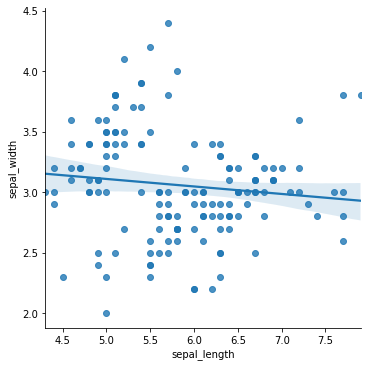

In [10]:
sns.lmplot(x='sepal_length', y='sepal_width', data=iris_df)
plt.show()

However, if you want to control the size and shape of the plot, you need to use regplot.

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

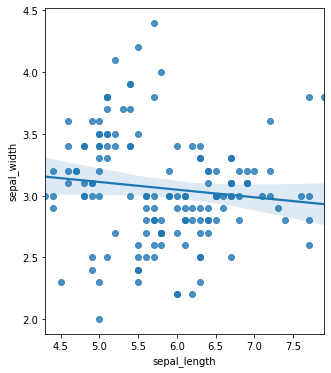

In [11]:
fig, ax = plt.subplots(figsize=(5,6))
sns.regplot(x="sepal_length", y="sepal_width", data=iris_df, ax=ax)

### Relplot


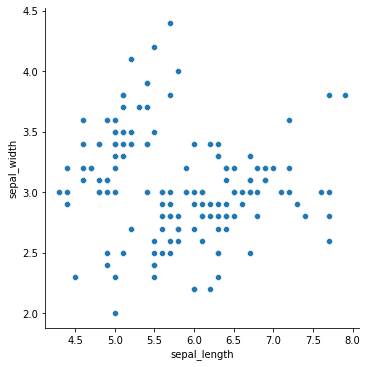

In [12]:
fig = sns.relplot(data=iris_df, x="sepal_length", y="sepal_width")
plt.show()

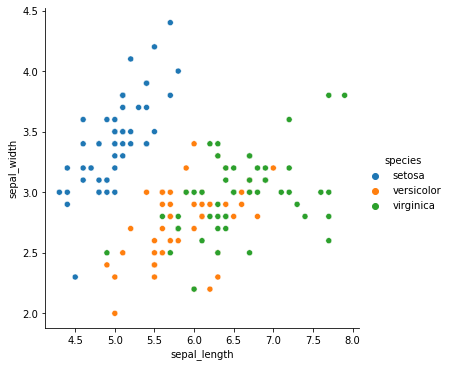

In [13]:
sns.relplot(data=iris_df, x="sepal_length", y="sepal_width", hue='species')
plt.show()

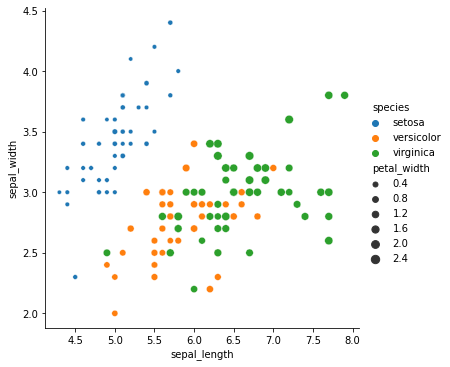

In [14]:
sns.relplot(data=iris_df, x="sepal_length", y="sepal_width", hue='species', size="petal_width")
plt.show()

What can you tell me about these species?

### Jointplot
This plot type is used to plot two variables with bivariate and univariate graphs.

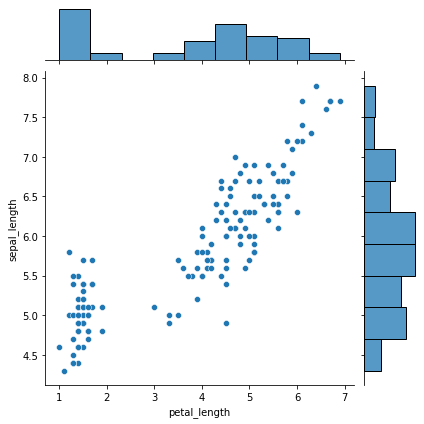

In [15]:
sns.jointplot(data=iris_df, x="petal_length", y="sepal_length")

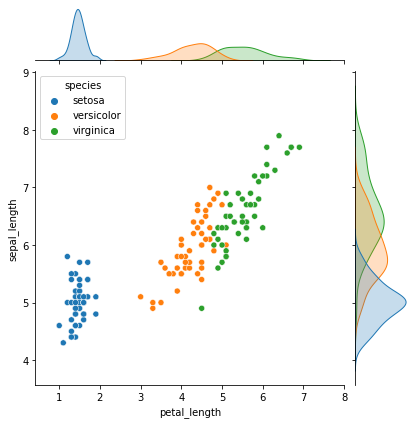

In [16]:
sns.jointplot(data=iris_df, x="petal_length", y="sepal_length", hue="species")

### Pairplot
It explores the pairwise relationship of the whole data set.

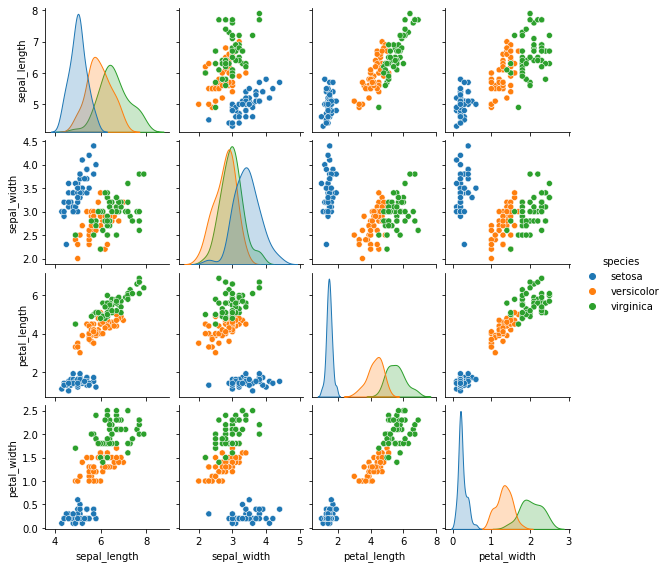

In [17]:
sns.pairplot(data=iris_df, hue="species", height=2.)
plt.show()

### Countplot
Countplot is like a simple bar plot that shows the counts of observations in each category.

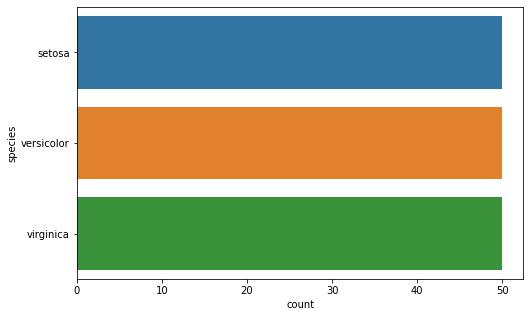

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(y='species', data=iris_df)
plt.show()

### Boxplot and Violinplot
Boxplot shows the distributions with respect to categories as a box plot. <br>
Violinplot is a combination of boxplot and densities of categories.

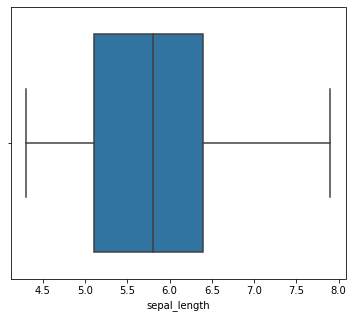

In [19]:
fig, ax = plt.subplots(figsize=(6,5))
sns.boxplot(x='sepal_length', data=iris_df)
plt.show()

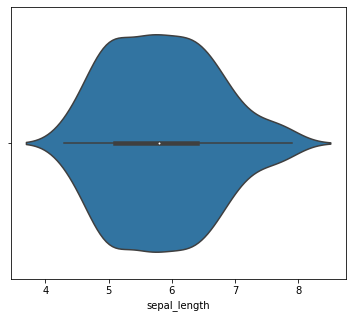

In [20]:
fig, ax = plt.subplots(figsize=(6,5))
sns.violinplot(x='sepal_length', data=iris_df)
plt.show()

### Heatmap
A personal favourite, the heatmap is a rectangular matrix like demonstration of values.

In [21]:
corr = iris_df.corr()

In [22]:
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


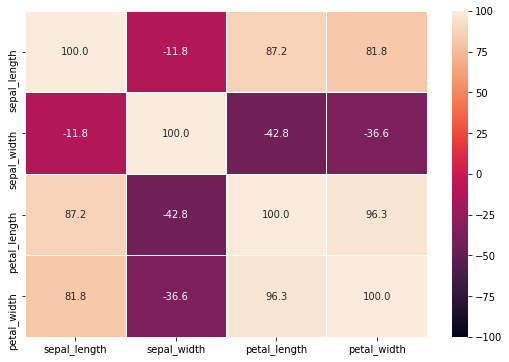

In [23]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr*100, annot=True, fmt="2.1f", linewidths=.5, ax=ax, vmin=-100)
plt.show()